In [1]:
import numpy as np
import pandas as pd
import os
import csv
from sklearn import linear_model as lm
from sklearn.preprocessing import StandardScaler as SC
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
import re
import time
!pip install wordcloud
from sklearn.feature_selection import SelectFromModel

In [2]:
# print(os.getcwd())
# print(os.listdir(os.getcwd()))

In [3]:
train = pd.read_csv('split_5/train.tsv', sep = '\t', header = 0)
test = pd.read_csv('split_5/test.tsv', sep = '\t', header = 0)
testlabel = pd.read_csv('split_5/test_y.tsv', sep = '\t', header = 0)


In [4]:
# d = {}
# with open('myvocab.txt','r') as f:
#     for line in f:
#         (key, val) = line.split('\n')
#         d[key] = val
# print(d)        

In [5]:
myvocab = np.genfromtxt("myvocab.txt", dtype=str, delimiter = '\n')


# Data Analysis

Highest words Used Graph

(-0.5, 799.5, 599.5, -0.5)

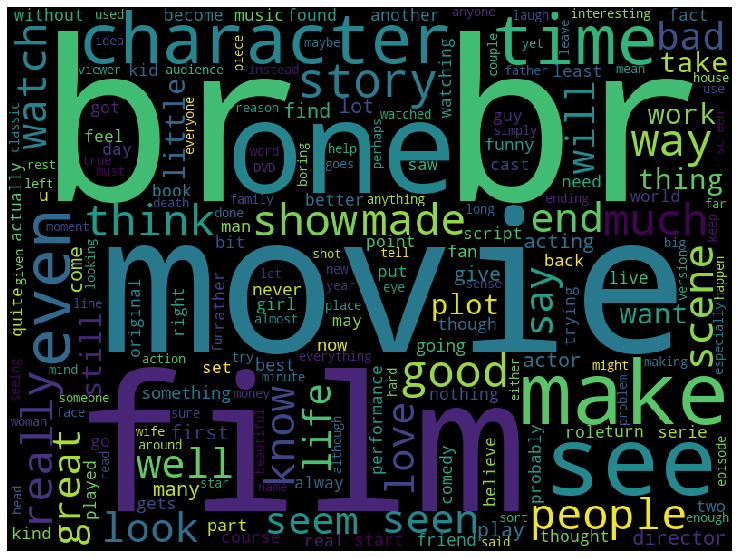

In [6]:
from wordcloud import WordCloud
cloud=WordCloud(width=800, height=600).generate(" ".join(train['review'])) # join function can help merge all words into one string. " " means space can be a sep between words.
plt.figure(figsize=(15,10))
plt.imshow(cloud)
plt.axis('off')

# Data Cleaning

Removing html tags and special characeters

In [7]:
#Remove HTML Tags
def remove_tags(string):
    result = re.sub('<.*?>','',string)
    return result

train['review'] = train['review'].apply(lambda cw : remove_tags(cw))
test['review'] = test['review'].apply(lambda cw : remove_tags(cw))

In [8]:
x_train = train['review']
y_train = train['sentiment']

x_test = test['review']
y_test = testlabel['sentiment']

In [9]:
stopwords = {"i", "me", "my", "myself", 
               "we", "our", "ours", "ourselves", 
                "you", "your", "yours", 
              "their", "they", "his", "her", 
               "she", "he", "a", "an", "and",
                "is", "was", "are", "were", 
               "him", "himself", "has", "have", 
                "it", "its", "the", "us"}

Removing Stop words

In [10]:
# len(model.get_support(indices=True))

In [11]:
# #Use this block for td-idf vectorizer only
# vectorizer = TfidfVectorizer(stop_words=stopwords,ngram_range=(1, 4),
#                              max_df=0.5, min_df=0.001)
# dtm_train = vectorizer.fit_transform(train["review"]) # Returens a DTM matrix
# #vectorizer.get_feature_names()
# dtm_train.shape

# lsvc = LinearSVC(C=0.5, penalty="l1", dual=False).fit(dtm_train, y_train)
# model = SelectFromModel(lsvc, prefit=True,max_features=1999)
# X_new = model.transform(dtm_train)
# X_new.shape

In [12]:
# init_vocab = vectorizer.get_feature_names()
# with open('init_vocab.txt', 'w') as filehandle:
#     filehandle.writelines("%s\n" % place for place in init_vocab)

# init_vocab

In [13]:
# Using new vectorizer to make train and test matrixes based on reduced vocabulary list
final_vectorizer = CountVectorizer(ngram_range=(1, 4),vocabulary = myvocab)
dtm2_train = final_vectorizer.fit_transform(train["review"]) # Returens a DTM matrix
dtm2_train.shape
dtm2_test = final_vectorizer.fit_transform(test["review"])

In [14]:
# final_vectorizer.vocabulary_

In [15]:
#x_train = X_new
x_train = dtm2_train
x_test = dtm2_test

In [16]:
# print(np.asarray(x_train))

In [17]:
# C= 1
# gamma = 1e-1
# clf = SVC(C= 0.001, gamma=gamma)
# clf.fit(x_train, y_train)

# Linear SVM

In [22]:
start_time_lasso = time.time()
clf = LinearSVC(C=0.1)
clf.fit(x_train, y_train)
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)
print("Time:", time.time() - start_time_lasso)

Time: 3.2533018589019775


In [23]:
print(metrics.classification_report(y_test, y_pred_test))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_test)
print(metrics.auc(fpr, tpr))



print(metrics.classification_report(y_train, y_pred_train))
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_pred_train)
print(metrics.auc(fpr, tpr))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89     12390
           1       0.89      0.89      0.89     12610

    accuracy                           0.89     25000
   macro avg       0.89      0.89      0.89     25000
weighted avg       0.89      0.89      0.89     25000

0.8907385147905854
              precision    recall  f1-score   support

           0       0.92      0.91      0.91     12610
           1       0.91      0.92      0.91     12390

    accuracy                           0.91     25000
   macro avg       0.91      0.91      0.91     25000
weighted avg       0.91      0.91      0.91     25000

0.9143696887886997


# Logistic Regression

In [20]:
start_time_lasso = time.time()
clf = LogisticRegression(C=0.52, max_iter=10000, verbose=5, penalty='l2', solver='saga')
clf.fit(x_train, y_train)

# y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)
print("Time:", time.time() - start_time_lasso)
y_pred_train = clf.predict(x_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 1015 epochs took 20 seconds
Time: 20.891143321990967


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.8s finished


In [21]:

print(metrics.classification_report(y_test, y_pred_test))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_test)
print(metrics.auc(fpr, tpr))



print(metrics.classification_report(y_train, y_pred_train))
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_pred_train)
print(metrics.auc(fpr, tpr))


              precision    recall  f1-score   support

           0       0.89      0.89      0.89     12390
           1       0.89      0.89      0.89     12610

    accuracy                           0.89     25000
   macro avg       0.89      0.89      0.89     25000
weighted avg       0.89      0.89      0.89     25000

0.8905799105082698
              precision    recall  f1-score   support

           0       0.92      0.91      0.91     12610
           1       0.91      0.92      0.91     12390

    accuracy                           0.91     25000
   macro avg       0.91      0.91      0.91     25000
weighted avg       0.91      0.91      0.91     25000

0.9145240687438835


# Ridge Regression

In [24]:
ridge = lm.Ridge(alpha = 0.9)
ridge.fit(x_train, y_train)

y_pred = ridge.predict(x_test)
y_pred_test = 1/(np.exp(-y_pred)+1)
#print("Test AUC:", metrics.roc_auc_score(y_test, y_pred_test))

y_pred = ridge.predict(x_train)
y_pred_train = 1/(np.exp(-y_pred)+1)


In [26]:
print("Test AUC:", metrics.roc_auc_score(y_test, y_pred_test))
print("Train AUC:", metrics.roc_auc_score(y_train, y_pred_train))

Test AUC: 0.9537513049010515
Train AUC: 0.9660565394184124
